In [52]:
import numpy as np 
import pandas as pd 

import xgboost as xgb
import sklearn


In [53]:
from math import sqrt
from numpy import concatenate
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# analysis

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import eli5
from eli5.sklearn import PermutationImportance

# evaluate

from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score


#Visualization
from matplotlib import rc
from matplotlib import pyplot

In [54]:
df=pd.read_csv(r'data_ML.csv')

In [55]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,shipping_is_express,has_urgency_banner,merchant_rating_count,product_id,revenu,discount,discount_percent,rating_score,overall_score,is_successful
0,16.00,14,100,0,3.76,54,26.0,8.0,8.0,1.0,...,0,1,568,5e9ae51d43d6a96e303acdb0,1600.0,-2.00,0.000000,0.002387,0,0
1,8.00,43,100,0,3.57,14,5.0,4.0,4.0,0.0,...,0,1,295,5ea10e2c617580260d55310a,800.0,35.00,437.500000,0.000588,0,0
2,8.00,8,5000,1,4.03,579,295.0,119.0,119.0,42.0,...,0,0,23832,5cedf17ad1d44c52c59e4aca,40000.0,0.00,0.000000,0.027435,0,1
3,2.72,3,100,1,3.10,20,6.0,4.0,4.0,2.0,...,0,1,14482,5ebf5819ebac372b070b0e70,272.0,0.28,10.294118,0.000729,0,0
4,3.92,9,10,0,5.00,1,1.0,0.0,0.0,0.0,...,0,0,65,5ec645bafd107a02279c8c54,39.2,5.08,129.591837,0.000059,0,0


In [56]:
cat_cols=[x for x in df.columns if df[x].dtype=='O']

In [57]:
cat_cols

['product_color', 'product_variation_size_id', 'product_id']

# 1. Traiter les variables catégorielles

In [58]:
from scipy.stats import chi2_contingency


for c in cat_cols :

  cat_crossed = pd.crosstab(df.units_sold, df[c])

  fvalue, pvalue,_,_ = chi2_contingency(cat_crossed, correction = True)
  if pvalue < 0.05 :
    print(f"pvalue est inférieur à 0,05, il existe donc une relation entre {c} et units_sold ")
  else : 
    print(f"la pvalue est supérieure à 0,05, il n'y a pas d'association entre units_sold et {c}")

pvalue est inférieur à 0,05, il existe donc une relation entre product_color et units_sold 
pvalue est inférieur à 0,05, il existe donc une relation entre product_variation_size_id et units_sold 
pvalue est inférieur à 0,05, il existe donc une relation entre product_id et units_sold 


# 2. Traiter les variables numeriques

In [59]:
from scipy.stats import chi2_contingency
features_num = [x for x in df.columns if df[x].dtype!='O']
for f in features_num :

  df_crossed = pd.crosstab(df.units_sold, df[f])

  fvalue, pvalue,_,_ = chi2_contingency(df_crossed, correction = True)
  
  if pvalue < 0.05 :
    print(f"pvalue est inférieur à 0,05, il existe donc une relation entre {f}  et units_solds ")
  else : 
    print(f"la pvalue est supérieure à 0,05, il n'y a pas d'association entre units_solds et  {f}")

la pvalue est supérieure à 0,05, il n'y a pas d'association entre units_solds et  price
pvalue est inférieur à 0,05, il existe donc une relation entre retail_price  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation entre units_sold  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation entre uses_ad_boosts  et units_solds 
la pvalue est supérieure à 0,05, il n'y a pas d'association entre units_solds et  rating
la pvalue est supérieure à 0,05, il n'y a pas d'association entre units_solds et  rating_count
pvalue est inférieur à 0,05, il existe donc une relation entre rating_five_count  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation entre rating_four_count  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation entre rating_three_count  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation entre rating_two_count  et units_solds 
pvalue est inférieur à 0,05, il existe donc une relation 

In [60]:
num_cols=[x for x in df.columns if df[x].dtype!='O']

In [61]:
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_is_express',
 'has_urgency_banner',
 'merchant_rating_count',
 'revenu',
 'discount',
 'discount_percent',
 'rating_score',
 'overall_score',
 'is_successful']

In [62]:
df.drop(['price', 'rating','rating_count','badge_local_product','badge_fast_shipping','shipping_is_express','has_urgency_banner','rating_score'],axis=1,inplace=True)


In [63]:
df.head()

,retail_price,units_sold,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_product_quality,product_color,product_variation_size_id,merchant_rating_count,product_id,revenu,discount,discount_percent,overall_score,is_successful
0,14,100,0,26.0,8.0,8.0,1.0,9.0,0,white,M,568,5e9ae51d43d6a96e303acdb0,1600.0,-2.00,0.000000,0,0
1,43,100,0,5.0,4.0,4.0,0.0,3.0,0,other,XS,295,5ea10e2c617580260d55310a,800.0,35.00,437.500000,0,0
2,8,5000,1,295.0,119.0,119.0,42.0,36.0,0,black,M,23832,5cedf17ad1d44c52c59e4aca,40000.0,0.00,0.000000,0,1
3,3,100,1,6.0,4.0,4.0,2.0,6.0,0,yellow,S,14482,5ebf5819ebac372b070b0e70,272.0,0.28,10.294118,0,0
4,9,10,0,1.0,0.0,0.0,0.0,0.0,0,blue,XS,65,5ec645bafd107a02279c8c54,39.2,5.08,129.591837,0,0


In [64]:
df=pd.get_dummies(df,columns=['product_color'],prefix='COLOR_',drop_first=True)

In [65]:
df=pd.get_dummies(df,columns=['product_variation_size_id'],prefix='SIZE_',drop_first=True)

In [66]:
df=pd.get_dummies(df,columns=['product_id'],prefix='ID_',drop_first=True)

In [67]:
df['units_sold'].shape

(1539,)

In [68]:
df.head()

,retail_price,units_sold,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_product_quality,merchant_rating_count,...,ID__5ef858a0d41d4c085fb829e6,ID__5ef9a1091df14e8f41dca4fa,ID__5efc475047f98d45ef7fa1f2,ID__5f0025c325561d2a49b8f58c,ID__5f01c514792d0b94d29d0cb6,ID__5f03643cc00703c46d6745f0,ID__5f046ac0980447385a1a28e4,ID__5f095371d25f1d274c028031,ID__5f0e6c204e43471f765df4f0,ID__5f11698e9a44cd5ecd1909db
0,14,100,0,26.0,8.0,8.0,1.0,9.0,0,568,...,0,0,0,0,0,0,0,0,0,0
1,43,100,0,5.0,4.0,4.0,0.0,3.0,0,295,...,0,0,0,0,0,0,0,0,0,0
2,8,5000,1,295.0,119.0,119.0,42.0,36.0,0,23832,...,0,0,0,0,0,0,0,0,0,0
3,3,100,1,6.0,4.0,4.0,2.0,6.0,0,14482,...,0,0,0,0,0,0,0,0,0,0
4,9,10,0,1.0,0.0,0.0,0.0,0.0,0,65,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn import preprocessing
labelencoding = preprocessing.LabelEncoder()

In [70]:
for i in list(df.columns):
    df[i] = labelencoding.fit_transform(df[i])

In [71]:
df.head()

,retail_price,units_sold,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_product_quality,merchant_rating_count,...,ID__5ef858a0d41d4c085fb829e6,ID__5ef9a1091df14e8f41dca4fa,ID__5efc475047f98d45ef7fa1f2,ID__5f0025c325561d2a49b8f58c,ID__5f01c514792d0b94d29d0cb6,ID__5f03643cc00703c46d6745f0,ID__5f046ac0980447385a1a28e4,ID__5f095371d25f1d274c028031,ID__5f0e6c204e43471f765df4f0,ID__5f11698e9a44cd5ecd1909db
0,13,8,0,26,8,8,1,9,0,130,...,0,0,0,0,0,0,0,0,0,0
1,40,8,0,5,4,4,0,3,0,94,...,0,0,0,0,0,0,0,0,0,0
2,7,10,1,222,113,113,42,36,0,734,...,0,0,0,0,0,0,0,0,0,0
3,2,8,1,6,4,4,2,6,0,637,...,0,0,0,0,0,0,0,0,0,0
4,8,6,0,1,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0


## Modeling

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from yellowbrick.model_selection import FeatureImportances
from sklearn import metrics

In [73]:
# FEATURES
X=df.drop('units_sold',axis=1)
# TARGET
y=df['units_sold']

In [74]:
y

0        8
1        8
2       10
3        8
4        6
        ..
1534    13
1535    14
1536    13
1537    13
1538    13
Name: units_sold, Length: 1539, dtype: int64

In [75]:
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)'''

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc_y = StandardScaler()\nX = sc_X.fit_transform(X)\ny = sc_y.fit_transform(y)'

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1231, 1380), (308, 1380), (1231,), (308,))

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Support Vector Regression

In [78]:
from sklearn.svm import SVR
svr_model = SVR()


In [79]:
svr_model.fit(X_train, y_train)

SVR()

In [80]:
import sklearn.metrics as mt
y_pred = svr_model.predict(X_test)
y_valid = y_test.copy()

gg = []
for i in y_pred:
 gg.append(i)
gf = pd.DataFrame(data=gg)
gf = gf.set_index(y_valid.index)
df_pred = pd.concat([y_valid, gf], axis=1)
df_pred.columns = ['Y_true', 'Y_pred']
df_pred.head()



,Y_true,Y_pred
178,9,7.550597
1504,12,13.982039
1055,8,6.356639
303,8,6.666555
544,8,8.100098


In [81]:
df_pred["Squared Error"] = 0.00
df_pred["Squared Error"] = ( df_pred['Y_true'] - df_pred['Y_pred'] )**2
df_pred

,Y_true,Y_pred,Squared Error
178,9,7.550597,2.100768
1504,12,13.982039,3.928478
1055,8,6.356639,2.700636
303,8,6.666555,1.778075
544,8,8.100098,0.010020
...,...,...,...
1523,13,13.927715,0.860655
330,8,7.290412,0.503515
734,9,7.582347,2.009740
31,6,6.199214,0.039686


In [82]:
MSE = np.mean(df_pred["Squared Error"])
print("\033[1m Mean Squared Error (MSE) regression loss on the test set is: {:.4f}".format(MSE))

 Mean Squared Error (MSE) regression loss on the test set is: 1.0585


In [83]:
RMSE = np.sqrt(np.mean(df_pred["Squared Error"]))
print("\033[1m Root Mean Squared Error (RMSE) regression loss on the testing set is: {:.4f}".format(RMSE))

 Root Mean Squared Error (RMSE) regression loss on the testing set is: 1.0288


In [84]:
df_pred["Absolute Error"] = 0.00
df_pred["Absolute Error"] = abs( df_pred['Y_true'] - df_pred['Y_pred'] )
df_pred

,Y_true,Y_pred,Squared Error,Absolute Error
178,9,7.550597,2.100768,1.449403
1504,12,13.982039,3.928478,1.982039
1055,8,6.356639,2.700636,1.643361
303,8,6.666555,1.778075,1.333445
544,8,8.100098,0.010020,0.100098
...,...,...,...,...
1523,13,13.927715,0.860655,0.927715
330,8,7.290412,0.503515,0.709588
734,9,7.582347,2.009740,1.417653
31,6,6.199214,0.039686,0.199214


In [85]:
MAE = np.mean(df_pred["Absolute Error"])
print("\033[1m Mean Absolute Error (MAE) regression loss on the testing set is: {:.4f}".format(MAE))

 Mean Absolute Error (MAE) regression loss on the testing set is: 0.8339


In [86]:
df_pred["Precent Error"] = 0.00
df_pred["Precent Error"] = abs (( df_pred['Y_true'] - df_pred['Y_pred']/ df_pred['Y_true'] ))
df_pred

,Y_true,Y_pred,Squared Error,Absolute Error,Precent Error
178,9,7.550597,2.100768,1.449403,8.161045
1504,12,13.982039,3.928478,1.982039,10.834830
1055,8,6.356639,2.700636,1.643361,7.205420
303,8,6.666555,1.778075,1.333445,7.166681
544,8,8.100098,0.010020,0.100098,6.987488
...,...,...,...,...,...
1523,13,13.927715,0.860655,0.927715,11.928637
330,8,7.290412,0.503515,0.709588,7.088698
734,9,7.582347,2.009740,1.417653,8.157517
31,6,6.199214,0.039686,0.199214,4.966798


In [87]:
MAPE = np.mean(df_pred["Precent Error"])
print("\033[1m Mean Absolute Percentage Error (MAPE) regression loss on the testing set is: {:.4%}".format(MAPE))

 Mean Absolute Percentage Error (MAPE) regression loss on the testing set is: 805.0462%


In [104]:
print('R2 Score:', metrics.r2_score(y_test,y_pred))

R2 Score: 0.5765891399319761


## Hyperparameter Optimization Using GridSearchCV  

In [89]:
param1 = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
          'C' : [0.01, 0.1, 1, 10, 100], #np.linspace(0.01, 10),
          'degree' : [3,8],
          'coef0' : [0.01,10,0.5],
          'epsilon': np.linspace(0.01, 10),
          'gamma' : ('auto','scale')
          }

In [90]:
from datetime import datetime 
start_time = datetime.now()

search1 = GridSearchCV(estimator = svr_model,
                     param_grid = param1,
                     cv = 5,
                     n_jobs = -1)
search1.fit(X_train, y_train)

time_elapsed = datetime.now() #— start_time 
Analysis_Duration = "{}".format(time_elapsed)
print("Analysis Duration:", Analysis_Duration)

Analysis Duration: 2022-08-26 07:55:55.748028


In [91]:
search1.best_params_

{'C': 10,
 'coef0': 0.5,
 'degree': 3,
 'epsilon': 0.01,
 'gamma': 'scale',
 'kernel': 'sigmoid'}

In [92]:
search1.best_estimator_

SVR(C=10, coef0=0.5, epsilon=0.01, kernel='sigmoid')

In [93]:
grid_pred = search1.predict(X_test)

y_valid = y_test.copy()

gg = []
for i in grid_pred:
 gg.append(i)
gf = pd.DataFrame(data=gg)
gf = gf.set_index(y_valid.index)
df_grid_pred = pd.concat([y_valid, gf], axis=1)
df_grid_pred.columns = ['Y_true', 'Y_pred']
df_grid_pred.head()


,Y_true,Y_pred
178,9,8.503693
1504,12,12.283462
1055,8,7.670092
303,8,8.005175
544,8,8.008118


In [94]:
df_grid_pred["diff"] = df_grid_pred['Y_pred'] - df_grid_pred['Y_true']
df_grid_pred.head()

,Y_true,Y_pred,diff
178,9,8.503693,-0.496307
1504,12,12.283462,0.283462
1055,8,7.670092,-0.329908
303,8,8.005175,0.005175
544,8,8.008118,0.008118


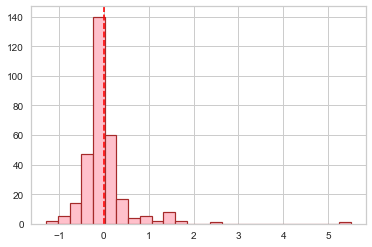

In [95]:
import matplotlib.pyplot as plt
plt.hist(df_grid_pred["diff"], bins=26, color='pink', edgecolor='brown', linewidth=1.2)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1.6)
plt.show()

In [96]:
pd.DataFrame({"Count": [(df_grid_pred["diff"]<0).sum(), 
                (df_grid_pred["diff"]==0).sum(),
                (df_grid_pred["diff"]>0).sum()]}, 
                columns=['Count'],
                index=['Underestimation', 'Exact Estimation', 'Overestimation'])

,Count
Underestimation,159
Exact Estimation,0
Overestimation,149


In [99]:
r1 = r2_score(grid_pred, y_test)
r2 = r2_score(y_test, grid_pred)

print(r1)
print(r2)

0.843212875703474
0.880820585292666


### Regression Metrics Before and After the GridSearchCV

In [98]:
df_grid_pred['Absolute Error'] = 0.00
df_grid_pred['Squared Error'] = 0.00
df_grid_pred['Precent Error'] = 0.00
df_grid_pred['Absolute Error'] = abs( df_grid_pred['Y_true'] - df_grid_pred['Y_pred'] )
df_grid_pred['Squared Error'] = ( df_grid_pred['Y_true'] - df_grid_pred['Y_pred'] )**2
df_grid_pred['Precent Error'] = abs (( df_grid_pred['Y_true'] - df_grid_pred['Y_pred'] ) / df_grid_pred['Y_true'] )
MSE1 = np.mean(df_grid_pred['Squared Error'])
RMSE1 = np.sqrt(np.mean(df_grid_pred['Squared Error']))
MAE1 = np.mean(df_grid_pred['Absolute Error'])
MAPE1 = np.mean(df_grid_pred['Precent Error'])
metrics = ['Mean squared error regression loss', 'Root mean squared error regression loss', 'Mean absolute error regression loss' ,'Mean absolute percentage error (MAPE) regression loss']
before = [MSE, RMSE, MAE, MAPE]
after = [MSE1, RMSE1, MAE1, MAPE1]
compare_metrics = pd.DataFrame({ "Regression Metrics": metrics, "Before Grid Search": before, "After Grid Search": after })
compare_metrics

,Regression Metrics,Before Grid Search,After Grid Search
0,Mean squared error regression loss,1.058527,0.297949
1,Root mean squared error regression loss,1.028847,0.545847
2,Mean absolute error regression loss,0.833889,0.282877
3,Mean absolute percentage error (MAPE) regressi...,8.050462,0.041070


In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))
print('MSE:', metrics.mean_squared_error(y_test, grid_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))
print('R2 Score:', metrics.r2_score(y_test,grid_pred))

MAE: 0.2828773098588365
MSE: 0.29794853676833477
RMSE: 0.5458466238499005
R2 Score: 0.880820585292666


In [102]:
'''svrmodel = SVR (kernel='sigmoid', degree=3, gamma='scale', coef0=0.5, C=10, epsilon=0.1,verbose=False, max_iter=-1)
    
svrmodel.fit(X_train, y_train)'''

SVR(C=10, coef0=0.5, kernel='sigmoid')

## Random Forest Regressor

In [ ]:
rff_model = RandomForestRegressor(random_state = 101)
param2 = {'bootstrap': [True],
          'max_depth': [80, 90, 100, 110],
          'max_features': [2, 3],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
          'n_estimators': [100, 200, 300, 1000]                                                                  
         }

In [ ]:


search2 = GridSearchCV(estimator = rff_model,
                     param_grid = param2,
                     scoring = 'neg_root_mean_squared_error',
                     cv = 5,
                     n_jobs = -1)

In [ ]:
search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_root_mean_squared_error')

In [ ]:
search2.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
modelrff = RandomForestRegressor(bootstrap = True,
                                 max_depth = 80,
                                 max_features = 3,
                                 min_samples_leaf = 3,
                                 min_samples_split = 10,
                                 n_estimators = 100,
                                 random_state = 101)

In [ ]:
modelrff.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, random_state=101)

In [ ]:
y_predrff = modelrff.predict(X_test)

In [ ]:
df_predrff = pd.DataFrame({'Initial Values':y_test, 'Predicted Values':y_predrff})
df_predrff

,Initial Values,Predicted Values
178,9,9.076027
1504,12,9.200940
1055,8,9.069252
303,8,9.073555
544,8,9.075756
...,...,...
1523,13,9.200940
330,8,9.073527
734,9,9.072165
31,6,9.071752


In [ ]:
r1 = r2_score(y_predrff, y_test)
r2 = r2_score(y_test, y_predrff)

print(r1)
print(r2)

-842.9725191642004
0.04899180384661439


In [ ]:
mse2 = MSE(y_predrff, y_test, squared=False)
print(mse2)

1.5419210389586957


In [ ]:
mae2 = mean_absolute_error(y_predrff, y_test)
print(mae2)

1.1744357496585378


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predrff))
print('MSE:', metrics.mean_squared_error(y_test, y_predrff))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predrff)))
print('R2 Score:', metrics.r2_score(y_test,y_predrff))

MAE: 1.1744357496585378
MSE: 2.3775204903834637
RMSE: 1.5419210389586957
R2 Score: 0.04899180384661439
